In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cluster_df.csv')
df

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,...,Fridge_p_cluster,Furnace_p_cluster,Garage door_p_cluster,Home office_p_cluster,Kitchen_p_cluster,Living room_p_cluster,Microwave_p_cluster,Solar_p_cluster,Well_p_cluster,Wine cellar_p_cluster
0,0.025337,-0.006463,0.008750,0.087916,0.042479,0.167406,-0.001395,0.002058,0.001758,0.385787,...,0,0,0,0,0,0,0,1,0,0
1,0.025807,-0.006290,0.008470,0.156919,0.036433,0.165267,-0.000902,0.001721,0.001565,0.384670,...,0,0,0,0,0,0,0,1,0,0
2,0.025576,-0.006267,0.008500,0.235353,0.013274,0.163328,-0.000955,0.001614,0.001473,0.384825,...,0,0,0,0,0,0,0,1,0,0
3,0.025345,-0.006155,0.008742,0.648559,0.013604,0.164950,-0.000875,0.001640,0.001382,0.382497,...,0,1,0,0,0,0,0,1,0,0
4,0.025422,-0.006155,0.008711,0.620258,0.013566,0.164431,-0.000928,0.001479,0.001382,0.382481,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43194,0.023220,-0.004931,0.120958,0.083554,0.012597,0.552404,0.000463,0.013228,0.001146,0.015165,...,1,0,0,1,0,0,0,0,0,0
43195,0.023276,-0.004931,0.120613,0.082856,0.012617,0.552199,0.000409,0.013504,0.001189,0.014911,...,1,0,0,1,0,0,0,0,0,0
43196,0.023145,-0.004931,0.121045,0.080806,0.012597,0.531886,0.000436,0.013378,0.001146,0.014674,...,1,0,0,1,0,0,0,0,0,0
43197,0.023145,-0.004931,0.120458,0.082413,0.012617,0.523531,0.000410,0.013303,0.001146,0.014589,...,1,0,0,1,0,0,0,0,0,0


In [3]:
# 음수값을 0으로
cols = df.columns[:]
for col in cols:
    df.loc[df[col]<0,[col]] = 0

df.head()

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,...,Fridge_p_cluster,Furnace_p_cluster,Garage door_p_cluster,Home office_p_cluster,Kitchen_p_cluster,Living room_p_cluster,Microwave_p_cluster,Solar_p_cluster,Well_p_cluster,Wine cellar_p_cluster
0,0.025337,0.0,0.008750,0.087916,0.042479,0.167406,0.0,0.002058,0.001758,0.385787,...,0,0,0,0,0,0,0,1,0,0
1,0.025807,0.0,0.008470,0.156919,0.036433,0.165267,0.0,0.001721,0.001565,0.384670,...,0,0,0,0,0,0,0,1,0,0
2,0.025576,0.0,0.008500,0.235353,0.013274,0.163328,0.0,0.001614,0.001473,0.384825,...,0,0,0,0,0,0,0,1,0,0
3,0.025345,0.0,0.008742,0.648559,0.013604,0.164950,0.0,0.001640,0.001382,0.382497,...,0,1,0,0,0,0,0,1,0,0
4,0.025422,0.0,0.008711,0.620258,0.013566,0.164431,0.0,0.001479,0.001382,0.382481,...,0,1,0,0,0,0,0,1,0,0


In [4]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-11-01 00:01', periods=len(df),  freq='min'))
df = df.set_index('time')
df

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,...,Fridge_p_cluster,Furnace_p_cluster,Garage door_p_cluster,Home office_p_cluster,Kitchen_p_cluster,Living room_p_cluster,Microwave_p_cluster,Solar_p_cluster,Well_p_cluster,Wine cellar_p_cluster
time,,,,,,,,,,,,,,,,,,,,,
2016-11-01 00:01:00,0.025337,0.0,0.008750,0.087916,0.042479,0.167406,0.000000,0.002058,0.001758,0.385787,...,0,0,0,0,0,0,0,1,0,0
2016-11-01 00:02:00,0.025807,0.0,0.008470,0.156919,0.036433,0.165267,0.000000,0.001721,0.001565,0.384670,...,0,0,0,0,0,0,0,1,0,0
2016-11-01 00:03:00,0.025576,0.0,0.008500,0.235353,0.013274,0.163328,0.000000,0.001614,0.001473,0.384825,...,0,0,0,0,0,0,0,1,0,0
2016-11-01 00:04:00,0.025345,0.0,0.008742,0.648559,0.013604,0.164950,0.000000,0.001640,0.001382,0.382497,...,0,1,0,0,0,0,0,1,0,0
2016-11-01 00:05:00,0.025422,0.0,0.008711,0.620258,0.013566,0.164431,0.000000,0.001479,0.001382,0.382481,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30 23:55:00,0.023220,0.0,0.120958,0.083554,0.012597,0.552404,0.000463,0.013228,0.001146,0.015165,...,1,0,0,1,0,0,0,0,0,0
2016-11-30 23:56:00,0.023276,0.0,0.120613,0.082856,0.012617,0.552199,0.000409,0.013504,0.001189,0.014911,...,1,0,0,1,0,0,0,0,0,0
2016-11-30 23:57:00,0.023145,0.0,0.121045,0.080806,0.012597,0.531886,0.000436,0.013378,0.001146,0.014674,...,1,0,0,1,0,0,0,0,0,0


In [5]:
# 시계열 월, 시간 정의
sw = [1,2,6,7,8,11,12]
sf = [3,4,5,9,10]
low = [13,14,15,16,17,18,19,20,21,22]
mid = [23,0,1,2,3,4,5,6]
high = [7,8,9,10,11,12]

In [6]:
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df.head(2)

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,...,Living room_p_cluster,Microwave_p_cluster,Solar_p_cluster,Well_p_cluster,Wine cellar_p_cluster,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,
2016-11-01 00:01:00,0.025337,0.0,0.00875,0.087916,0.042479,0.167406,0.0,0.002058,0.001758,0.385787,...,0,0,1,0,0,11,1,Tuesday,0,1
2016-11-01 00:02:00,0.025807,0.0,0.00847,0.156919,0.036433,0.165267,0.0,0.001721,0.001565,0.384670,...,0,0,1,0,0,11,1,Tuesday,0,2


In [7]:
df1 = df[df['hour'].isin(high)]
df1

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,...,Living room_p_cluster,Microwave_p_cluster,Solar_p_cluster,Well_p_cluster,Wine cellar_p_cluster,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,
2016-11-01 07:00:00,0.029524,0.0,0.008499,0.082568,0.012475,0.115175,0.0,0.314612,0.001210,0.004938,...,1,0,0,0,1,11,1,Tuesday,7,0
2016-11-01 07:01:00,0.029704,0.0,0.008499,0.081473,0.012475,0.113266,0.0,0.319414,0.001256,0.004938,...,1,0,0,0,1,11,1,Tuesday,7,1
2016-11-01 07:02:00,0.080999,0.0,0.008453,0.081648,0.012475,0.113468,0.0,0.318858,0.001256,0.004973,...,1,0,0,0,1,11,1,Tuesday,7,2
2016-11-01 07:03:00,0.145498,0.0,0.008484,0.082349,0.012455,0.111744,0.0,0.318705,0.001119,0.004938,...,1,0,0,0,1,11,1,Tuesday,7,3
2016-11-01 07:04:00,0.029765,0.0,0.008453,0.081845,0.012475,0.113451,0.0,0.316924,0.001302,0.004973,...,1,0,0,0,1,11,1,Tuesday,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30 12:55:00,0.036593,0.0,0.008464,0.087321,0.013370,0.428564,0.0,0.002377,0.002848,0.005149,...,0,0,0,0,0,11,30,Wednesday,12,55
2016-11-30 12:56:00,0.036174,0.0,0.008494,0.086532,0.013370,0.428429,0.0,0.002219,0.002893,0.005132,...,0,0,0,0,0,11,30,Wednesday,12,56
2016-11-30 12:57:00,0.036115,0.0,0.104577,0.084791,0.013334,0.421462,0.0,0.002245,0.002848,0.005114,...,0,0,0,0,0,11,30,Wednesday,12,57


In [8]:
df1.columns

Index(['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p', 'Barn_p_cluster', 'Dishwasher_p_cluster',
       'Fridge_p_cluster', 'Furnace_p_cluster', 'Garage door_p_cluster',
       'Home office_p_cluster', 'Kitchen_p_cluster', 'Living room_p_cluster',
       'Microwave_p_cluster', 'Solar_p_cluster', 'Well_p_cluster',
       'Wine cellar_p_cluster', 'month', 'day', 'weekday', 'hour', 'minute'],
      dtype='object')

In [9]:
interested = ['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p', 'Barn_p_cluster', 'Dishwasher_p_cluster',
       'Fridge_p_cluster', 'Furnace_p_cluster', 'Garage door_p_cluster',
       'Home office_p_cluster', 'Kitchen_p_cluster', 'Living room_p_cluster',
       'Microwave_p_cluster', 'Solar_p_cluster', 'Well_p_cluster',
       'Wine cellar_p_cluster']

In [10]:
df1 = df1[interested]
df1.head()

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,...,Fridge_p_cluster,Furnace_p_cluster,Garage door_p_cluster,Home office_p_cluster,Kitchen_p_cluster,Living room_p_cluster,Microwave_p_cluster,Solar_p_cluster,Well_p_cluster,Wine cellar_p_cluster
time,,,,,,,,,,,,,,,,,,,,,
2016-11-01 07:00:00,0.029524,0.0,0.008499,0.082568,0.012475,0.115175,0.0,0.314612,0.001210,0.004938,...,0,0,0,0,0,1,0,0,0,1
2016-11-01 07:01:00,0.029704,0.0,0.008499,0.081473,0.012475,0.113266,0.0,0.319414,0.001256,0.004938,...,0,0,0,0,0,1,0,0,0,1
2016-11-01 07:02:00,0.080999,0.0,0.008453,0.081648,0.012475,0.113468,0.0,0.318858,0.001256,0.004973,...,0,0,0,0,0,1,0,0,0,1
2016-11-01 07:03:00,0.145498,0.0,0.008484,0.082349,0.012455,0.111744,0.0,0.318705,0.001119,0.004938,...,0,0,0,0,0,1,0,0,0,1
2016-11-01 07:04:00,0.029765,0.0,0.008453,0.081845,0.012475,0.113451,0.0,0.316924,0.001302,0.004973,...,0,0,0,0,0,1,0,0,0,1


In [11]:
cols = ['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p']

In [12]:
#기본요금
total=0
for i in cols:
    a = sum(df1[i])
    total+=a
print(total)

8031.860528286798


In [13]:
df1.columns

Index(['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p', 'Barn_p_cluster', 'Dishwasher_p_cluster',
       'Fridge_p_cluster', 'Furnace_p_cluster', 'Garage door_p_cluster',
       'Home office_p_cluster', 'Kitchen_p_cluster', 'Living room_p_cluster',
       'Microwave_p_cluster', 'Solar_p_cluster', 'Well_p_cluster',
       'Wine cellar_p_cluster'],
      dtype='object')

In [14]:
len(df1)

10800

In [15]:
Barn0 = df1.loc[df1['Barn_p_cluster']==0]
a1 = sum(Barn0['Barn_p'])
Barn1 = df1.loc[df1['Barn_p_cluster']==1]
a2 = sum(Barn1['Barn_p'])
print(a1,a2)

664.6506982184947 44.43684482574463


In [16]:
Dish0 = df1.loc[df1['Dishwasher_p_cluster']==0]
b1 = sum(Dish0['Dishwasher_p'])
Dish1 = df1.loc[df1['Dishwasher_p_cluster']==1]
b2 = sum(Dish1['Dishwasher_p'])
print(b1,b2)

85.19325921719428 501.43288856744766


In [17]:
Fridge0 = df1.loc[df1['Fridge_p_cluster']==0]
c1 = sum(Fridge0['Fridge_p'])
Fridge1 = df1.loc[df1['Fridge_p_cluster']==1]
c2 = sum(Fridge1['Fridge_p'])
print(c1,c2)

60.5554843135178 604.6005394458771


In [18]:
Furnace0 = df1.loc[df1['Furnace_p_cluster']==0]
d1 = sum(Furnace0['Furnace_p'])
Furnace1 = df1.loc[df1['Furnace_p_cluster']==1]
d2 = sum(Furnace1['Furnace_p'])
print(d1,d2)

799.7788078784941 1839.3156298696995


In [19]:
Garagedoor0 = df1.loc[df1['Garage door_p_cluster']==0]
e1 = sum(Garagedoor0['Garage door_p'])
Garagedoor1 = df1.loc[df1['Garage door_p_cluster']==1]
e2 = sum(Garagedoor1['Garage door_p'])
print(e1,e2)

141.08035025792194 10.204910695552824


In [20]:
office0 = df1.loc[df1['Home office_p_cluster']==0]
f1 = sum(office0['Home office_p'])
office1 = df1.loc[df1['Home office_p_cluster']==1]
f2 = sum(office1['Home office_p'])
print(f1,f2)

521.1474830843508 1039.7156873047352


In [21]:
Kitchen0 = df1.loc[df1['Kitchen_p_cluster']==0]
g1 = sum(Kitchen0['Kitchen_p'])
Kitchen1 = df1.loc[df1['Kitchen_p_cluster']==1]
g2 = sum(Kitchen1['Kitchen_p'])
print(g1,g2)

63.34405052403586 71.8985630273819


In [22]:
Living0 = df1.loc[df1['Living room_p_cluster']==0]
h1 = sum(Living0['Living room_p'])
Living1 = df1.loc[df1['Living room_p_cluster']==1]
h2 = sum(Living1['Living room_p'])
print(h1,h2)

72.42717582268958 702.3868306130171


In [23]:
Microwave0 = df1.loc[df1['Microwave_p_cluster']==0]
i1 = sum(Microwave0['Microwave_p'])
Microwave1 = df1.loc[df1['Microwave_p_cluster']==1]
i2 = sum(Microwave1['Microwave_p'])
print(i1,i2)

30.80989792856827 171.43961489200592


In [24]:
Solar0 = df1.loc[df1['Solar_p_cluster']==0]
j1 = sum(Solar0['Solar_p'])
Solar1 = df1.loc[df1['Solar_p_cluster']==1]
j2 = sum(Solar1['Solar_p'])
print(j1,j2)

54.39651965140364 0


In [25]:
Well0 = df1.loc[df1['Well_p_cluster']==0]
k1 = sum(Well0['Well_p'])
Well1 = df1.loc[df1['Well_p_cluster']==1]
k2 = sum(Well1['Well_p'])
print(k1,k2)

104.27870571643142 154.22336894273758


In [26]:
Wine0 = df1.loc[df1['Wine cellar_p_cluster']==0]
l1 = sum(Wine0['Wine cellar_p'])
Wine1 = df1.loc[df1['Wine cellar_p_cluster']==1]
l2 = sum(Wine1['Wine cellar_p'])
print(l1,l2)

109.2770029325038 185.26621455699205


In [27]:
a = sum([a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1])

In [28]:
#수요이전 값
b = sum([a2,b2,c2,d2,e2,f2,g2,h2,i2,j2,k2,l2])

In [36]:
t3 = total*188.8/60
t3

25273.587795675794

In [37]:
t4 = ((a*188.8)+(b*107.0))/60
t4

18013.94537257197

In [38]:
reduce_1 = (t3-t4)/t3*100
reduce_1

28.724225787784352

In [31]:
t = total*140.7/60
t

18834.71293883254

In [32]:
t2 = ((a*140.7)+(b*94.1))/60
t2

14699.024223470215

In [35]:
reduce_2 = (t-t2)/t*100
reduce_2

21.957800624800363

In [40]:
(reduce_1+reduce_2)/2

25.34101320629236

In [32]:
Barn1['Barn_p'].values

array([1.01551485, 1.52280807, 1.26583421, 1.48685956, 0.73204273,
       1.12219357, 0.73171616, 0.80114895, 0.99943215, 0.83302695,
       1.48831832, 0.96911168, 0.8049733 , 0.73360109, 0.93976885,
       0.88836831, 0.887003  , 0.81825775, 1.58611441, 1.68627656,
       1.10316682, 1.41394556, 1.03322041, 1.4949863 , 1.50706697,
       1.57286394, 1.48207211, 1.5711652 , 0.95143563, 1.53111422,
       0.94701338, 1.52139342, 1.30773032, 1.1998955 , 1.56422174,
       1.56164765, 1.36153519])

In [33]:
#수요이전할 항목
Barn1['Barn_p'], Dish1['Dishwasher_p'], Fridge1['Fridge_p'], Furnace1['Furnace_p'], Garagedoor1['Garage door_p'], office1['Home office_p'],
Kitchen1['Kitchen_p'], Living1['Living room_p'], Microwave1['Microwave_p'], Solar1['Solar_p'], Well1['Well_p'], Wine1['Wine cellar_p']

(time
 2016-11-01 09:42:00    0.501184
 2016-11-01 09:43:00    1.058942
 2016-11-01 09:44:00    1.057025
 2016-11-01 09:45:00    0.919817
 2016-11-03 11:11:00    0.998717
                          ...   
 2016-11-28 11:09:00    1.067112
 2016-11-28 11:10:00    0.755116
 2016-11-29 10:50:00    1.105978
 2016-11-29 10:51:00    1.106305
 2016-11-29 10:52:00    0.998540
 Name: Kitchen_p, Length: 73, dtype: float64,
 time
 2016-11-01 07:00:00    0.314612
 2016-11-01 07:01:00    0.319414
 2016-11-01 07:02:00    0.318858
 2016-11-01 07:03:00    0.318705
 2016-11-01 07:04:00    0.316924
                          ...   
 2016-11-30 08:54:00    0.308623
 2016-11-30 08:55:00    0.315541
 2016-11-30 08:56:00    0.311295
 2016-11-30 08:57:00    0.309980
 2016-11-30 08:58:00    0.314771
 Name: Living room_p, Length: 2247, dtype: float64,
 time
 2016-11-01 07:46:00    0.716783
 2016-11-01 07:47:00    1.061827
 2016-11-01 07:48:00    1.045318
 2016-11-01 07:49:00    1.029980
 2016-11-01 07:50:00    1.

In [34]:
Barn1 = pd.DataFrame(Barn1['Barn_p'])
Dish1 = pd.DataFrame(Dish1['Dishwasher_p'])
Fridge1 = pd.DataFrame(Fridge1['Fridge_p'])
Furnace1 = pd.DataFrame(Furnace1['Furnace_p'])
Garagedoor1 = pd.DataFrame(Garagedoor1['Garage door_p'])
office1 = pd.DataFrame(office1['Home office_p'])
Kitchen1 = pd.DataFrame(Kitchen1['Kitchen_p'])
Living1 = pd.DataFrame(Living1['Living room_p'])
Microwave1 = pd.DataFrame(Microwave1['Microwave_p'])
Solar1 = pd.DataFrame(Solar1['Solar_p'])
Well1 = pd.DataFrame(Well1['Well_p'])
Wine1 = pd.DataFrame(Wine1['Wine cellar_p'])

In [35]:
Living1['Living room_p']

time
2016-11-01 07:00:00    0.314612
2016-11-01 07:01:00    0.319414
2016-11-01 07:02:00    0.318858
2016-11-01 07:03:00    0.318705
2016-11-01 07:04:00    0.316924
                         ...   
2016-11-30 08:54:00    0.308623
2016-11-30 08:55:00    0.315541
2016-11-30 08:56:00    0.311295
2016-11-30 08:57:00    0.309980
2016-11-30 08:58:00    0.314771
Name: Living room_p, Length: 2247, dtype: float64

In [36]:
d1 = pd.read_csv('w.csv')
d1 = d1.set_index('time')
d1.head()

,real,predict,month,day,weekday,hour,minute
time,,,,,,,
2016-11-01 07:00:00,1.737450,1.676485,11,1,Tuesday,7,0
2016-11-01 07:01:00,1.729317,1.669187,11,1,Tuesday,7,1
2016-11-01 07:02:00,1.636267,1.585148,11,1,Tuesday,7,2
2016-11-01 07:03:00,1.811750,1.742807,11,1,Tuesday,7,3
2016-11-01 07:04:00,1.588817,1.541889,11,1,Tuesday,7,4


In [37]:
d1['predict']

time
2016-11-01 07:00:00    1.676485
2016-11-01 07:01:00    1.669187
2016-11-01 07:02:00    1.585148
2016-11-01 07:03:00    1.742807
2016-11-01 07:04:00    1.541889
                         ...   
2016-11-01 12:55:00    0.373900
2016-11-01 12:56:00    0.375033
2016-11-01 12:57:00    0.364356
2016-11-01 12:58:00    0.364302
2016-11-01 12:59:00    0.361543
Name: predict, Length: 360, dtype: float64

In [38]:
#기기1
Barn1.head()

,Barn_p
time,
2016-11-04 07:03:00,1.015515
2016-11-04 07:17:00,1.522808
2016-11-09 07:54:00,1.265834
2016-11-09 07:55:00,1.486860
2016-11-09 08:20:00,0.732043


In [39]:
list = [Barn1['Barn_p'], Dish1['Dishwasher_p'], Fridge1['Fridge_p'], Furnace1['Furnace_p'], Garagedoor1['Garage door_p'], office1['Home office_p'],
Kitchen1['Kitchen_p'], Living1['Living room_p'], Microwave1['Microwave_p'], Solar1['Solar_p'], Well1['Well_p'], Wine1['Wine cellar_p']]

In [40]:
df = pd.DataFrame(list)
df = df.T
df['day'] = df.index.day
df = df.loc[df['day']==1]
df = df.drop(columns=['day'])
df

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p
time,,,,,,,,,,,,
2016-11-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.314612,NaN,NaN,NaN,0.123498
2016-11-01 07:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.319414,NaN,NaN,NaN,0.123334
2016-11-01 07:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.318858,NaN,NaN,NaN,0.123154
2016-11-01 07:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.318705,NaN,NaN,NaN,0.122793
2016-11-01 07:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.316924,NaN,NaN,NaN,0.122630
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-01 12:28:00,NaN,NaN,0.099031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-01 12:29:00,NaN,NaN,0.118936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-01 12:30:00,NaN,NaN,0.121190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
a = df.sum(axis='columns')
a = pd.DataFrame(a)
a = a.reset_index()
a.time = a.time.astype(str)
a

,time,0
0,2016-11-01 07:00:00,0.438110
1,2016-11-01 07:01:00,0.442749
2,2016-11-01 07:02:00,0.442012
3,2016-11-01 07:03:00,0.441498
4,2016-11-01 07:04:00,0.439553
...,...,...
306,2016-11-01 12:28:00,0.099031
307,2016-11-01 12:29:00,0.118936
308,2016-11-01 12:30:00,0.121190
309,2016-11-01 12:31:00,0.122771


In [42]:
b = d1['predict']
b = pd.DataFrame(b)
b = b.reset_index()
b.time = b.time.astype(str)
b

,time,predict
0,2016-11-01 07:00:00,1.676485
1,2016-11-01 07:01:00,1.669187
2,2016-11-01 07:02:00,1.585148
3,2016-11-01 07:03:00,1.742807
4,2016-11-01 07:04:00,1.541889
...,...,...
355,2016-11-01 12:55:00,0.373900
356,2016-11-01 12:56:00,0.375033
357,2016-11-01 12:57:00,0.364356
358,2016-11-01 12:58:00,0.364302


In [43]:
df = pd.merge(a, b, how='outer', on='time')
df

,time,0,predict
0,2016-11-01 07:00:00,0.438110,1.676485
1,2016-11-01 07:01:00,0.442749,1.669187
2,2016-11-01 07:02:00,0.442012,1.585148
3,2016-11-01 07:03:00,0.441498,1.742807
4,2016-11-01 07:04:00,0.439553,1.541889
...,...,...,...
355,2016-11-01 12:55:00,NaN,0.373900
356,2016-11-01 12:56:00,NaN,0.375033
357,2016-11-01 12:57:00,NaN,0.364356
358,2016-11-01 12:58:00,NaN,0.364302


In [44]:
df = df.fillna(0)
df

,time,0,predict
0,2016-11-01 07:00:00,0.438110,1.676485
1,2016-11-01 07:01:00,0.442749,1.669187
2,2016-11-01 07:02:00,0.442012,1.585148
3,2016-11-01 07:03:00,0.441498,1.742807
4,2016-11-01 07:04:00,0.439553,1.541889
...,...,...,...
355,2016-11-01 12:55:00,0.000000,0.373900
356,2016-11-01 12:56:00,0.000000,0.375033
357,2016-11-01 12:57:00,0.000000,0.364356
358,2016-11-01 12:58:00,0.000000,0.364302


In [45]:
df.columns

Index(['time', 0, 'predict'], dtype='object')

In [46]:
df['total'] = df['predict'] - df[0]
df.to_csv("final.csv")

In [47]:
df['total']

0      1.238374
1      1.226438
2      1.143136
3      1.301308
4      1.102336
         ...   
355    0.373900
356    0.375033
357    0.364356
358    0.364302
359    0.361543
Name: total, Length: 360, dtype: float64

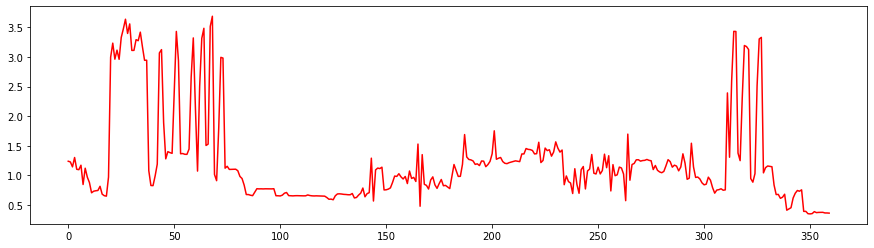

In [48]:
plt.figure(figsize=(15,4))
plt.plot(df['total'], c='red')

In [49]:
df2 = pd.read_csv("HomeC_work.csv")
df2

,real,predict,month,day,weekday,hour,minute
0,0.013283,-0.013313,11,1,Tuesday,0,1
1,0.068133,0.025262,11,1,Tuesday,0,2
2,0.118167,0.072004,11,1,Tuesday,0,3
3,0.699050,0.704830,11,1,Tuesday,0,4
4,0.666250,0.671340,11,1,Tuesday,0,5
...,...,...,...,...,...,...,...
43194,0.947467,0.952020,11,30,Wednesday,23,55
43195,0.949917,0.954362,11,30,Wednesday,23,56
43196,0.925950,0.931391,11,30,Wednesday,23,57
43197,0.918600,0.924323,11,30,Wednesday,23,58


In [50]:
df2 = df2.loc[df2['day']==1]
df2 = df2[df2['hour'].isin(high)]
df2['time'] = pd.DatetimeIndex(pd.date_range('2016-11-01 07:00', periods=len(df),  freq='min'))
df2['time'] = df2['time'].astype(str)

In [51]:
total = pd.merge(df,df2, how='outer', on='time')
total

,time,0,predict_x,total,real,predict_y,month,day,weekday,hour,minute
0,2016-11-01 07:00:00,0.438110,1.676485,1.238374,1.737450,1.676485,11,1,Tuesday,7,0
1,2016-11-01 07:01:00,0.442749,1.669187,1.226438,1.729317,1.669187,11,1,Tuesday,7,1
2,2016-11-01 07:02:00,0.442012,1.585148,1.143136,1.636267,1.585148,11,1,Tuesday,7,2
3,2016-11-01 07:03:00,0.441498,1.742807,1.301308,1.811750,1.742807,11,1,Tuesday,7,3
4,2016-11-01 07:04:00,0.439553,1.541889,1.102336,1.588817,1.541889,11,1,Tuesday,7,4
...,...,...,...,...,...,...,...,...,...,...,...
355,2016-11-01 12:55:00,0.000000,0.373900,0.373900,0.386750,0.373900,11,1,Tuesday,12,55
356,2016-11-01 12:56:00,0.000000,0.375033,0.375033,0.387800,0.375033,11,1,Tuesday,12,56
357,2016-11-01 12:57:00,0.000000,0.364356,0.364356,0.377917,0.364356,11,1,Tuesday,12,57
358,2016-11-01 12:58:00,0.000000,0.364302,0.364302,0.377867,0.364302,11,1,Tuesday,12,58


In [52]:
total['time'] = pd.to_datetime(total['time'])
total = total.set_index('time')

In [53]:
interested = ['total','predict_x']

In [54]:
total2 = total[interested]

In [59]:
total2 = total2.sort_index(ascending=False)

Text(0, 0.5, 'usage(kw)')

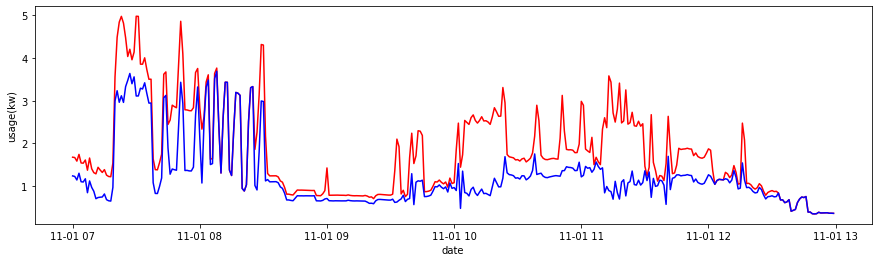

In [58]:
plt.figure(figsize=(15,4))
plt.plot(total2['predict_x'], c='red')
plt.plot(total2['total'], c='blue')
plt.xlabel("date")
plt.ylabel("usage(kw)")